http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

In [2]:
!pip install torch torchvision

     |████████████████████████████████| 752.0 MB 4.4 kB/s eta 0:00:018   |▊                               | 15.7 MB 6.1 MB/s eta 0:02:02     |▊                               | 17.2 MB 6.1 MB/s eta 0:02:01     |█▎                              | 31.0 MB 6.7 MB/s eta 0:01:48     |█▌                              | 34.5 MB 6.7 MB/s eta 0:01:47     |█▌                              | 34.6 MB 848 kB/s eta 0:14:06     |█▊                              | 40.0 MB 2.4 MB/s eta 0:05:02     |█▊                              | 40.1 MB 2.4 MB/s eta 0:05:02     |█▊                              | 40.3 MB 2.4 MB/s eta 0:05:02     |█▊                              | 40.7 MB 2.4 MB/s eta 0:05:02     |██                              | 44.4 MB 9.5 MB/s eta 0:01:15     |██                              | 45.0 MB 9.5 MB/s eta 0:01:15     |██                              | 47.9 MB 5.3 MB/s eta 0:02:12     |██▌                             | 59.2 MB 4.1 MB/s eta 0:02:48     |██▌                             | 59.7 MB 

In [3]:
import torch

In [4]:
torch.__version__

'1.5.0'

In [5]:
x = torch.Tensor(5, 3)
x

tensor([[4.1486e-08, 1.3556e-19, 1.8567e-01],
        [1.2043e-32, 1.3563e-19, 1.8888e+31],
        [4.7414e+16, 4.0047e-11, 6.4097e-10],
        [5.8253e-10, 6.4097e-10, 1.3567e-19],
        [4.1486e-08, 1.4585e-19, 6.3369e-10]])

In [6]:
print(x.size())

torch.Size([5, 3])


In [7]:
from torch.autograd import Variable

In [8]:
x = Variable(torch.ones(2, 2), requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [9]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [10]:
print(y.grad_fn)

In [11]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [12]:
out.backward()

In [13]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


## Training a classifier
http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [14]:
import torch
import torchvision
import torchvision.transforms as transforms

In [15]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


 bird  frog   dog horse


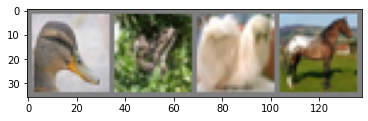

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [17]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [18]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.SGD(net.parameters(), lr=0.0005, momentum=0.9)

In [20]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.279
[1,  4000] loss: 2.031
[1,  6000] loss: 1.853
[1,  8000] loss: 1.706
[1, 10000] loss: 1.610
[1, 12000] loss: 1.568
[2,  2000] loss: 1.504
[2,  4000] loss: 1.448
[2,  6000] loss: 1.424
[2,  8000] loss: 1.396
[2, 10000] loss: 1.373
[2, 12000] loss: 1.340
Finished Training


GroundTruth:    cat  ship  ship plane


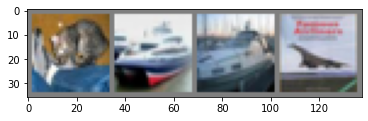

In [21]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [22]:
outputs = net(Variable(images))

In [23]:
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   frog  ship  ship plane


In [24]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 52 %


/pytorch/aten/src/ATen/native/BinaryOps.cpp:81: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.


## Accuracy vs epochs
* 2 epochs - Accuracy of the network on the 10000 test images: 53 %, Wall time: 57 s
* 5 epochs - Accuracy of the network on the 10000 test images: 62 %, Wall time: 2min 18s
* 25 epochs - Accuracy of the network on the 10000 test images: 59 %, Wall time: 13min 10s, see ringing as learning rate too high